<h1> Net salaries analysis </h1>

In this session, I will analyze average net salary for the main world cities. We have data from 2010 to 2020 inclusive. 

Here's the dataset I use - https://www.kaggle.com/cityapiio/average-net-salary-after-tax-main-world-cities

<h2>Importing our files </h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('cities_net_salaries.csv')

<h2>Data preview and cleaning</h2>

In [3]:
dt.head(10)

,City,"""Region""","""Country""","""Average Monthly Net Salary (After Tax)","2010""","""Average Monthly Net Salary (After Tax).1","2011""","""Average Monthly Net Salary (After Tax).2","2012""","""Average Monthly Net Salary (After Tax).3",...,"""Average Monthly Net Salary (After Tax).6","2016""","""Average Monthly Net Salary (After Tax).7","2017""","""Average Monthly Net Salary (After Tax).8","2018""","""Average Monthly Net Salary (After Tax).9","2019""","""Average Monthly Net Salary (After Tax).10","2020"""
0,New York City,"""New York""","""United States of America""",3300.000000,3568.530000,4017.991667,4339.513069,3476.340323,3376.010678,4026.656605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Washington, D.C.","""District of Columbia""","""United States of America""",2200.000000,3365.200744,3700.000000,3981.700000,4573.356667,3479.050000,3900.222222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,San Francisco,"""California""","""United States of America""",4700.000000,2633.333333,4195.428571,4167.538462,3470.000000,4058.783333,4281.510400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Berlin,"""""","""Germany""",0.000000,2826.086957,2283.950617,2395.516063,2477.888148,1999.827437,2290.615929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Los Angeles,"""California""","""United States of America""",4166.666667,3049.180000,2496.750083,3532.333333,3417.846154,3093.676563,3659.096774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bern,"""Canton of Bern""","""Switzerland""",0.000000,0.000000,5920.736004,6822.916667,0.000000,5711.263882,4229.301706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Geneva,"""Canton of Geneva""","""Switzerland""",4741.379310,5588.235294,5853.379152,6575.682140,7342.113465,6806.678250,5383.243691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Zurich,"""Canton of Zurich""","""Switzerland""",5550.287356,7664.623032,5236.597938,6065.033784,7043.153384,6684.251719,5901.110424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Basel,"""""","""Switzerland""",0.000000,0.000000,5670.103093,5572.916667,6406.772110,5358.716728,4292.511378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,London,"""England""","""United Kingdom""",2977.053140,3511.432719,3179.496037,3289.444770,3182.764313,3042.014095,3039.696772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p> As we can see, column names are improperly loaded. Each "Average Monthly Net Salary (After tax) {year}" column is split into two. We need to change it. </p>

Let's print column names to double-check it

In [4]:
dt.columns

Index(['City', ' "Region"', ' "Country"',
       ' "Average Monthly Net Salary (After Tax)', ' 2010"',
       ' "Average Monthly Net Salary (After Tax).1', ' 2011"',
       ' "Average Monthly Net Salary (After Tax).2', ' 2012"',
       ' "Average Monthly Net Salary (After Tax).3', ' 2013"',
       ' "Average Monthly Net Salary (After Tax).4', ' 2014"',
       ' "Average Monthly Net Salary (After Tax).5', ' 2015"',
       ' "Average Monthly Net Salary (After Tax).6', ' 2016"',
       ' "Average Monthly Net Salary (After Tax).7', ' 2017"',
       ' "Average Monthly Net Salary (After Tax).8', ' 2018"',
       ' "Average Monthly Net Salary (After Tax).9', ' 2019"',
       ' "Average Monthly Net Salary (After Tax).10', ' 2020"'],
      dtype='object')

<h2> Cleaning the data </h2>

<h3> Changing column names </h3>

Let's generate a list that will contain only proper column names

In [5]:
new_columns = ['City', 'Region', 'Country']
for i in range(2010, 2021):
    new_year = 'Avg' + str(i)
    new_columns.append(new_year)

Now, we can select only proper columns. We will use lenght of new columns to make sure we have the same number of new column names as we have columns

In [6]:
dt = dt.iloc[:, 0:len(new_columns)]

Now, let's assign new column names and verify they are correct.

In [7]:
dt.columns = new_columns
dt.head(1)

,City,Region,Country,Avg2010,Avg2011,Avg2012,Avg2013,Avg2014,Avg2015,Avg2016,Avg2017,Avg2018,Avg2019,Avg2020
0,New York City,"""New York""","""United States of America""",3300.0,3568.53,4017.991667,4339.513069,3476.340323,3376.010678,4026.656605,4121.088445,4658.585654,5122.297026,6023.253437


<h3>Spaces and quotes in Region and Country columns</h3>

In [8]:
dt.head(5)

,City,Region,Country,Avg2010,Avg2011,Avg2012,Avg2013,Avg2014,Avg2015,Avg2016,Avg2017,Avg2018,Avg2019,Avg2020
0,New York City,"""New York""","""United States of America""",3300.000000,3568.530000,4017.991667,4339.513069,3476.340323,3376.010678,4026.656605,4121.088445,4658.585654,5122.297026,6023.253437
1,"Washington, D.C.","""District of Columbia""","""United States of America""",2200.000000,3365.200744,3700.000000,3981.700000,4573.356667,3479.050000,3900.222222,4095.370370,4762.834321,5596.545455,5601.921903
2,San Francisco,"""California""","""United States of America""",4700.000000,2633.333333,4195.428571,4167.538462,3470.000000,4058.783333,4281.510400,3975.943333,6111.775926,7289.561905,7930.791453
3,Berlin,"""""","""Germany""",0.000000,2826.086957,2283.950617,2395.516063,2477.888148,1999.827437,2290.615929,2321.019859,2454.085939,2541.969201,2669.410143
4,Los Angeles,"""California""","""United States of America""",4166.666667,3049.180000,2496.750083,3532.333333,3417.846154,3093.676563,3659.096774,3356.289041,3929.714286,4430.179756,4507.581500


We can see the values in Region and Country columns have quotes and spaces around them, while Cities do not. 

In [9]:
def germanyComparison():
    if dt.iloc[3,2] == 'Germany':
        print(dt.iloc[3,2], 'and Germany', 'are the same')
    else:
        print(dt.iloc[3,2], 'and Germany', 'are NOT the same')

germanyComparison()

 "Germany" and Germany are NOT the same


Let's remove quotes and strip values of spaces at the beginning and the end.

In [10]:
for i in ['Region', 'Country']:
    dt[i] = dt[i].str.replace('\"','')
    dt[i] = dt[i].str.strip()

Now, we can run the same comparison we did before

In [11]:
germanyComparison()

Germany and Germany are the same


<h3>Empty values</h3>

Let's replace empty values with np.NaN values. Empty value can even be noticed in Region column for Berlin.

In [12]:
dt.head(5)

,City,Region,Country,Avg2010,Avg2011,Avg2012,Avg2013,Avg2014,Avg2015,Avg2016,Avg2017,Avg2018,Avg2019,Avg2020
0,New York City,New York,United States of America,3300.000000,3568.530000,4017.991667,4339.513069,3476.340323,3376.010678,4026.656605,4121.088445,4658.585654,5122.297026,6023.253437
1,"Washington, D.C.",District of Columbia,United States of America,2200.000000,3365.200744,3700.000000,3981.700000,4573.356667,3479.050000,3900.222222,4095.370370,4762.834321,5596.545455,5601.921903
2,San Francisco,California,United States of America,4700.000000,2633.333333,4195.428571,4167.538462,3470.000000,4058.783333,4281.510400,3975.943333,6111.775926,7289.561905,7930.791453
3,Berlin,,Germany,0.000000,2826.086957,2283.950617,2395.516063,2477.888148,1999.827437,2290.615929,2321.019859,2454.085939,2541.969201,2669.410143
4,Los Angeles,California,United States of America,4166.666667,3049.180000,2496.750083,3532.333333,3417.846154,3093.676563,3659.096774,3356.289041,3929.714286,4430.179756,4507.581500


In [13]:
dt = dt.replace(r'^\s*$', np.NaN, regex=True)

We fixed most errors. Let's start our analysis.

<h2>Analysis</h2>

<h3>Top 10 cities 2010-2020 change</h3>

Let's choose top 10 cities that had the highest average net salary in 2020 and compare these values to 2010.

We need to get only cities that have information about net salaries for these years, sort them to choose top 10 and create a column that will show percentage increase.

At the ened, we will limit our analysis only to 2010 and 2020

In [14]:
top10=dt[(dt['Avg2010']>0) & (dt['Avg2020']>0)].sort_values('Avg2020', ascending=False).head(10)

In [15]:
top10['Chg_Perc_2010_2020'] = 100*(top10['Avg2020']-top10['Avg2010'])/top10['Avg2010']

In [16]:
top10_focused =top10.loc[:, ['City', 'Region', 'Country', 'Avg2010', 'Avg2020', 'Chg_Perc_2010_2020' ]]

In [17]:
top10_focused

,City,Region,Country,Avg2010,Avg2020,Chg_Perc_2010_2020
2,San Francisco,California,United States of America,4700.000000,7930.791453,68.740244
7,Zurich,Canton of Zurich,Switzerland,5550.287356,6839.398662,23.226028
292,San Jose,California,United States of America,4150.000000,6603.333333,59.116466
6,Geneva,Canton of Geneva,Switzerland,4741.379310,6375.551249,34.466172
0,New York City,New York,United States of America,3300.000000,6023.253437,82.522831
1,"Washington, D.C.",District of Columbia,United States of America,2200.000000,5601.921903,154.632814
301,Charlotte,North Carolina,United States of America,2576.666667,5431.924615,110.812081
14,Boston,Massachusetts,United States of America,2950.000000,5178.646000,75.547322
296,Dallas,Texas,United States of America,2864.333333,4825.108974,68.454869
325,Atlanta,Georgia,United States of America,2033.333333,4721.348839,132.197484


Some cities observed over 100% avg net salary increase. That's impressive! Let's put in on a graph to visualize it better.

<AxesSubplot:xlabel='City'>

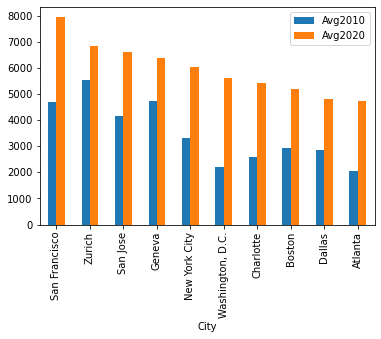

In [18]:
top10_focused.plot(x='City', y=['Avg2010', 'Avg2020'], kind='bar')

<h3>Objects</h3>

Let's generate objects that will answer questions such as average net salary per year or region or country of a given city.

In [19]:
class City:
    def __init__(self, city, region, country, avg2010, avg2020):
        self.city = city
        self.region = region
        self.country = country
        self.avg2010 = avg2010
        self.avg2020 = avg2020    

In [20]:
cities_available = []
for i in range(len(top10_focused)):
    city = dt.loc[i, "City"].replace(' ', '').replace('.', '').replace(',', '')
    region = dt.loc[i, "Region"]
    country = dt.loc[i, "Country"]
    avg2010 = dt.loc[i, "Avg2010"]
    avg2020 = dt.loc[i, "Avg2020"]
    cities_available.append(city)
    
    globals()[city] = City(city, region, country, avg2010, avg2020)

Below we can see variables for each city for which the instance was created.

In [21]:
print(cities_available)

['NewYorkCity', 'WashingtonDC', 'SanFrancisco', 'Berlin', 'LosAngeles', 'Bern', 'Geneva', 'Zurich', 'Basel', 'London']


Let's check if our class and instances are working

In [22]:
NewYorkCity.avg2010

3300.0

In [23]:
WashingtonDC.region

'District of Columbia'

In [24]:
WashingtonDC.avg2010

2200.0

<h2>The end, thank you! </h2>